## Initialization

In [10]:
import numpy as np
import pandas as pd
import os
import math
import time
import datetime
from statistics import mean

from bqplot import pyplot as bplt
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

plt.style.use('bmh')
mpl.rcParams['figure.figsize'] = (20.0, 6.0)

## Linear Regression

In [2]:
df = pd.read_csv('ventas_mascotas.csv', header=None)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.0,5.0,5.0,10.0,10.0,10.0,15.0,15.0,15.0,20.0,20.0,20.0
1,1.6,2.2,1.4,1.9,2.4,2.6,2.3,2.7,2.8,2.6,2.9,3.1


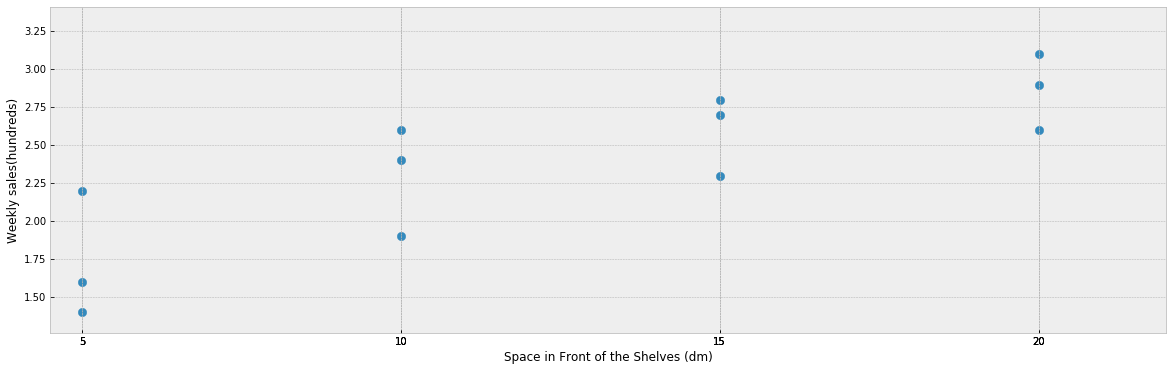

In [23]:
x = df[0]
y = df[1]

plt.xlim(min(x) * 0.90, max(x) * 1.10)
plt.ylim(min(y) * 0.90, max(y) * 1.10)

plt.ylabel('Weekly sales(hundreds)')

plt.xticks(x)
plt.xlabel('Space in Front of the Shelves (dm)')

plt.scatter(x, y, s=70)
plt.show()

$$Y = \alpha + \beta x + \epsilon$$

$$E[ Y_i | X=x_i] = \alpha + \beta x_i$$

$$\epsilon_i = Y_i - E[Y_i|X=x_i] = Y_i - (\alpha + \beta x_i) $$

$$Y_i = \alpha + \beta x_i + \epsilon_i $$

### Best Fit Line

$$ y = mx + b $$
$$ b = \bar{y} - m\bar{x} $$

$$ and $$

$$ m = \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x^2}} $$

$$ or $$

$$ m = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})^2}} $$

In [35]:
def create_dataset(number, variance, step=2, offset=(0, 0)):
    x_off, y_off = offset
    xs = np.arange(x_off, number + x_off)
    ys = np.arange(y_off, number * step + y_off, step)
    ys += np.random.randint(-variance, variance, size=number)
    return xs, ys

In [28]:
def best_fit_slope(xs, ys):
    x_mean = xs.mean()
    y_mean = ys.mean()
    m = ((xs - x_mean) * (ys - y_mean)).sum() / ((xs - x_mean)**2).sum()
    b = y_mean - m * x_mean
    return m, b

In [29]:
def squared_error(y_initial, y_final):
    return ((y_initial - y_final) ** 2).sum()

In [30]:
def coeff_of_determination(y_initial, y_final):
    ser = squared_error(y_initial, y_final)
    sem = squared_error(y_initial, y_initial.mean())
    return 1 - (ser / sem)

In [31]:
def calc_y(x, m=None, b=None):
    if None in [m, b]:
        m, b = best_fit_slope(xs, ys)
    return m * x + b

In [32]:
def add_point(target):
    m, b = best_fit_slope(scat.x, scat.y)
    y_hat.x = scat.x
    y_hat.y = calc_y(scat.x, m, b)

In [38]:
xs, ys = create_dataset(40, 20, 2, offset=(10,100))
coeff_of_determination(ys, calc_y(xs))

0.8413432347748435

In [34]:
bplt.clear() # BQplot code
figure = bplt.figure(title='Regression', animation_duration=500) # BQplot code
scat = bplt.scatter(xs, ys, enable_move=True, interactions={'click': 'add'} )
scat.observe(add_point, names=['x'])
y_hat = bplt.plot(xs, calc_y(xs))
bplt.show()